In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('spam.csv')
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
df.fillna('', inplace=True)

def clean_text(text):
    text = text.lower()

    punctuation = ['.', ',', '!', '?', ';', ':', '-', '(', ')', '[', ']', '{', '}', "'", '"']
    for char in punctuation:
        text = text.replace(char, ' ')

    text = ' '.join(text.split())
    return text.strip()


df['cleaned_text'] = df['Message'].apply(clean_text)

print(df.head())

  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in 2 a wkly comp to win fa cup fina...  
3        u dun say so early hor u c already then say  
4  nah i don t think he goes to usf he lives arou...  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)


X = df['Message']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)


results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

In [10]:

nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)
y_pred_nb = nb_model.predict(X_test_count)


results["Model"].append("Naive Bayes")
results["Accuracy"].append(accuracy_score(y_test, y_pred_nb))
results["Precision"].append(precision_score(y_test, y_pred_nb))
results["Recall"].append(recall_score(y_test, y_pred_nb))
results["F1 Score"].append(f1_score(y_test, y_pred_nb))

print("\nNaive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 0.9885139985642498
Precision: 0.9775280898876404
Recall: 0.9354838709677419
F1 Score: 0.9560439560439561
Confusion Matrix:
 [[1203    4]
 [  12  174]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier




knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_count, y_train)
y_pred_knn = knn_model.predict(X_test_count)

results["Model"].append("K-Nearest Neighbors")
results["Accuracy"].append(accuracy_score(y_test, y_pred_knn))
results["Precision"].append(precision_score(y_test, y_pred_knn))
results["Recall"].append(recall_score(y_test, y_pred_knn))
results["F1 Score"].append(f1_score(y_test, y_pred_knn))

print("\nK-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Results:
Accuracy: 0.9246231155778895
Precision: 1.0
Recall: 0.43548387096774194
F1 Score: 0.6067415730337079
Confusion Matrix:
 [[1207    0]
 [ 105   81]]


In [12]:
from sklearn.tree import DecisionTreeClassifier
### 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_count, y_train)
y_pred_dt = dt_model.predict(X_test_count)

# Evaluate Decision Tree
results["Model"].append("Decision Tree")
results["Accuracy"].append(accuracy_score(y_test, y_pred_dt))
results["Precision"].append(precision_score(y_test, y_pred_dt))
results["Recall"].append(recall_score(y_test, y_pred_dt))
results["F1 Score"].append(f1_score(y_test, y_pred_dt))

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.9727207465900933
Precision: 0.9252873563218391
Recall: 0.8655913978494624
F1 Score: 0.8944444444444445
Confusion Matrix:
 [[1194   13]
 [  25  161]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
### 4. Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_count, y_train)
y_pred_rf = rf_model.predict(X_test_count)

# Evaluate Random Forest
results["Model"].append("Random Forest")
results["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
results["Precision"].append(precision_score(y_test, y_pred_rf))
results["Recall"].append(recall_score(y_test, y_pred_rf))
results["F1 Score"].append(f1_score(y_test, y_pred_rf))

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.9777458722182341
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091
Confusion Matrix:
 [[1207    0]
 [  31  155]]


In [14]:
from sklearn.svm import SVC
### 5. Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_count, y_train)
y_pred_svm = svm_model.predict(X_test_count)

# Evaluate SVM
results["Model"].append("Support Vector Machine")
results["Accuracy"].append(accuracy_score(y_test, y_pred_svm))
results["Precision"].append(precision_score(y_test, y_pred_svm))
results["Recall"].append(recall_score(y_test, y_pred_svm))
results["F1 Score"].append(f1_score(y_test, y_pred_svm))

print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
Accuracy: 0.9827709978463748
Precision: 1.0
Recall: 0.8709677419354839
F1 Score: 0.9310344827586207
Confusion Matrix:
 [[1207    0]
 [  24  162]]


In [15]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_count, y_train)

# Predict using the trained model
y_pred_lr = lr_model.predict(X_test_count)

# Calculate Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Calculate Precision
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')  # You can use 'macro', 'micro', 'binary'

# Calculate Recall
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')  # You can use 'macro', 'micro', 'binary'

# Calculate F1-Score
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')  # You can use 'macro', 'micro', 'binary'

# Generate Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Evaluate Logistic Regression
results["Model"].append("Logistic Regression")
results["Accuracy"].append(accuracy_score(y_test, y_pred_lr))
results["Precision"].append(precision_score(y_test, y_pred_lr))
results["Recall"].append(recall_score(y_test, y_pred_lr))
results["F1 Score"].append(f1_score(y_test, y_pred_lr))
print(f"Accuracy for Logistic Regression: {accuracy_lr:.4f}")
print(f"Precision for Logistic Regression: {precision_lr:.4f}")
print(f"Recall for Logistic Regression: {recall_lr:.4f}")
print(f"F1-Score for Logistic Regression: {f1_lr:.4f}")
print(f"Confusion Matrix for Logistic Regression:\n{conf_matrix_lr}")

Accuracy for Logistic Regression: 0.9835
Precision for Logistic Regression: 0.9838
Recall for Logistic Regression: 0.9835
F1-Score for Logistic Regression: 0.9830
Confusion Matrix for Logistic Regression:
[[1207    0]
 [  23  163]]


In [16]:

### Display Comparison Table

# Convert results dictionary to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\nComparison of Classification Models:\n", results_df)


Comparison of Classification Models:
                     Model  Accuracy  Precision    Recall  F1 Score
0             Naive Bayes  0.988514   0.977528  0.935484  0.956044
1     K-Nearest Neighbors  0.924623   1.000000  0.435484  0.606742
2           Decision Tree  0.972721   0.925287  0.865591  0.894444
3           Random Forest  0.977746   1.000000  0.833333  0.909091
4  Support Vector Machine  0.982771   1.000000  0.870968  0.931034
5     Logistic Regression  0.983489   1.000000  0.876344  0.934097


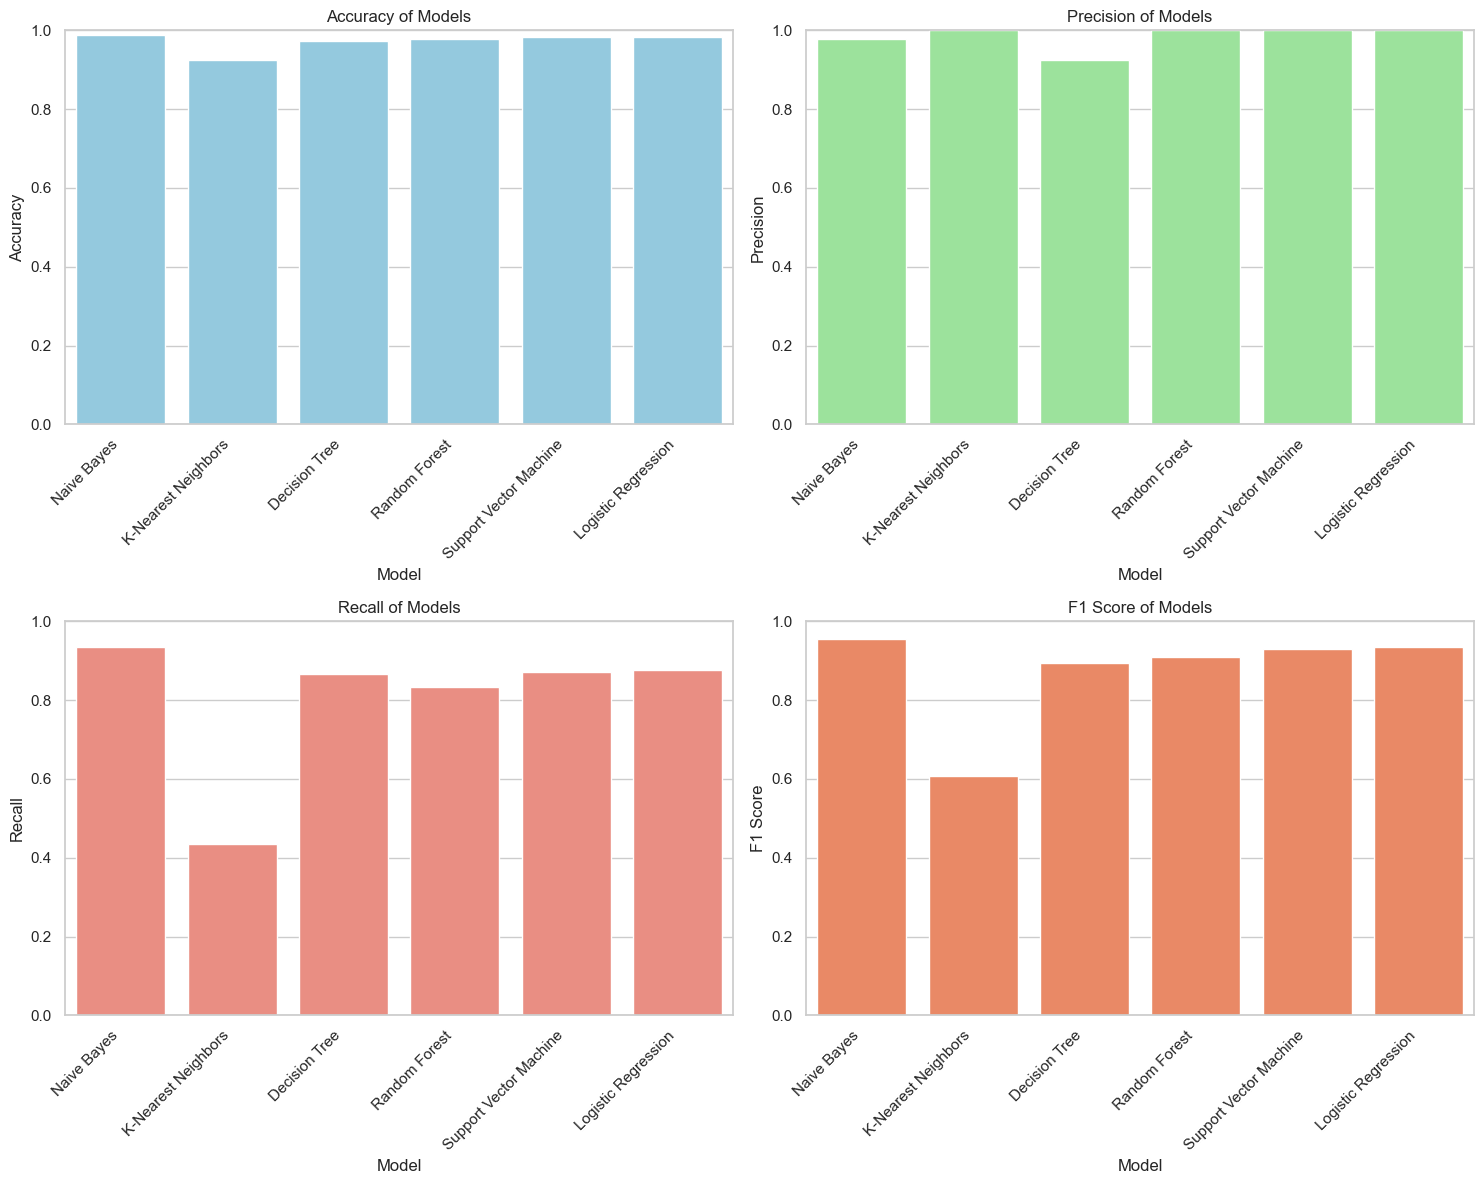

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results dictionary to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting each metric as a separate bar plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Accuracy of Models')
axes[0, 0].set_ylim(0, 1)  # Assuming metrics range from 0 to 1 for clarity

# Precision Plot
sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title('Precision of Models')
axes[0, 1].set_ylim(0, 1)

# Recall Plot
sns.barplot(x='Model', y='Recall', data=results_df, ax=axes[1, 0], color="salmon")
axes[1, 0].set_title('Recall of Models')
axes[1, 0].set_ylim(0, 1)

# F1 Score Plot
sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[1, 1], color="coral")
axes[1, 1].set_title('F1 Score of Models')
axes[1, 1].set_ylim(0, 1)

# Rotate x labels for better readability
for ax in axes.flatten():
    ax.set_xticks(range(len(results_df['Model'])))  # Set fixed ticks
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
pip install streamlit scikit-learn pandas


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.1 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.1 MB 2.5 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/9.1 MB 2.9 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.1 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.1 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 4.5/9.1 MB 3.6 MB/s eta 0:00:02
   ----------------------- ---------------- 5.2/9.1 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 6.0/9.1 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 6.8/9.1 MB 3.6 MB/s eta 0:00:01
   --------------------------------- ------ 7.6/9.1 MB 3.6 MB/s eta 0:00:01
   ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (507122745.py, line 1)